# Question 3a
---



In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

In [ ]:
#Uploading the pistachio.csv file from local drive
from google.colab import files


uploaded = files.upload()

Saving pistachio.csv to pistachio.csv


In [ ]:
import io


#loading using CSV file
pistachio = pd.read_csv(io.BytesIO(uploaded['pistachio.csv']))
print(pistachio)


       AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0     73107  1161.8070    442.4074    217.7261        0.8705  305.0946   
1     89272  1173.1810    460.2551    251.9546        0.8369  337.1419   
2     60955   999.7890    386.9247    209.1255        0.8414  278.5863   
3     79537  1439.5129    466.7973    221.2136        0.8806  318.2289   
4     96395  1352.6740    515.8730    246.5945        0.8784  350.3340   
...     ...        ...         ...         ...           ...       ...   
1713  65570  2071.4451    418.0258    217.1458        0.8545  288.9400   
1714  68849  1441.2590    451.0457    205.2553        0.8905  296.0764   
1715  90270  1370.5380    428.9636    269.8232        0.7774  339.0211   
1716  73148  1309.8430    469.0491    208.3141        0.8960  305.1801   
1717  78780  1324.8831    451.5905    239.3016        0.8481  316.7109   

      SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  \
0       0.9424        77579  0.771

In [ ]:
#All keys in the csv file
print(pistachio.keys())
print(pistachio.shape)

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'Class'],
      dtype='object')
(1718, 17)


In [ ]:
#Performing one-hot encoding

#Retaining the names of the class
pistachio_unique_class_values = list(pistachio['Class'].unique())
print(pistachio_unique_class_values)

#Converting type of columns to category
pistachio['Class'] = pistachio['Class'].astype('category')

#Assigning numerical values to the pistachio classes and replacing the non-numerical values
pistachio['Class'] = pistachio['Class'].cat.codes

print(pistachio)

['Kirmizi_Pistachio', 'Siit_Pistachio']
       AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0     73107  1161.8070    442.4074    217.7261        0.8705  305.0946   
1     89272  1173.1810    460.2551    251.9546        0.8369  337.1419   
2     60955   999.7890    386.9247    209.1255        0.8414  278.5863   
3     79537  1439.5129    466.7973    221.2136        0.8806  318.2289   
4     96395  1352.6740    515.8730    246.5945        0.8784  350.3340   
...     ...        ...         ...         ...           ...       ...   
1713  65570  2071.4451    418.0258    217.1458        0.8545  288.9400   
1714  68849  1441.2590    451.0457    205.2553        0.8905  296.0764   
1715  90270  1370.5380    428.9636    269.8232        0.7774  339.0211   
1716  73148  1309.8430    469.0491    208.3141        0.8960  305.1801   
1717  78780  1324.8831    451.5905    239.3016        0.8481  316.7109   

      SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNE

In [ ]:
#Removing the target "Class" from "pistachio"
cols_to_include = pistachio.columns[:-1]
#Putting all independent variables into dataframe "X"
X = pd.DataFrame(pistachio[cols_to_include])

#Putting "Class" data into Target dataframe Y""
Y = pd.DataFrame(pistachio.Class)

In [ ]:
#Established feature data
X

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0     73107  1161.8070    442.4074    217.7261        0.8705  305.0946   
1     89272  1173.1810    460.2551    251.9546        0.8369  337.1419   
2     60955   999.7890    386.9247    209.1255        0.8414  278.5863   
3     79537  1439.5129    466.7973    221.2136        0.8806  318.2289   
4     96395  1352.6740    515.8730    246.5945        0.8784  350.3340   
...     ...        ...         ...         ...           ...       ...   
1713  65570  2071.4451    418.0258    217.1458        0.8545  288.9400   
1714  68849  1441.2590    451.0457    205.2553        0.8905  296.0764   
1715  90270  1370.5380    428.9636    269.8232        0.7774  339.0211   
1716  73148  1309.8430    469.0491    208.3141        0.8960  305.1801   
1717  78780  1324.8831    451.5905    239.3016        0.8481  316.7109   

      SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  \
0       0.9424        77579  0.7710        2.0319     0.6806       0.6896   
1       0.9641        92598  0.7584        1.8267     0.8151       0.7325   
2       0.9465        64400  0.7263        1.8502     0.7663       0.7200   
3       0.9437        84281  0.7568        2.1102     0.4823       0.6817   
4       0.9549       100950  0.7428        2.0920     0.6620       0.6791   
...        ...          ...     ...           ...        ...          ...   
1713    0.8976        73054  0.5945        1.9251     0.1920       0.6912   
1714    0.9340        73716  0.6459        2.1975     0.4165       0.6564   
1715    0.9722        92847  0.7400        1.5898     0.6039       0.7903   
1716    0.9376        78014  0.6341        2.2516     0.5358       0.6506   
1717    0.9328        84454  0.7021        1.8871     0.5640       0.7013   

      SHAPEFACTOR_1  SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPEFACTOR_4  
0            0.0061         0.0030         0.4756         0.9664  
1            0.0052         0.0028         0.5366         0.9802  
2            0.0063         0.0034         0.5184         0.9591  
3            0.0059         0.0028         0.4648         0.9807  
4            0.0054         0.0026         0.4612         0.9648  
...             ...            ...            ...            ...  
1713         0.0064         0.0033         0.4778         0.9197  
1714         0.0066         0.0030         0.4309         0.9469  
1715         0.0048         0.0030         0.6246         0.9930  
1716         0.0064         0.0028         0.4233         0.9532  
1717         0.0057         0.0030         0.4919         0.9282  

[1718 rows x 16 columns]

In [ ]:
#Established target data
Y

Class
0         0
1         1
2         0
3         0
4         0
...     ...
1713      0
1714      0
1715      1
1716      0
1717      1

[1718 rows x 1 columns]

In [ ]:
X.describe()

AREA    PERIMETER   MAJOR_AXIS   MINOR_AXIS  ECCENTRICITY  \
count    1718.000000  1718.000000  1718.000000  1718.000000   1718.000000   
mean    79871.952852  1421.797588   446.206444   238.193128      0.840347   
std     12968.217051   373.408835    31.885328    30.426445      0.049026   
min     29808.000000   858.363000   321.425500   133.509600      0.504900   
25%     71898.500000  1169.633225   426.554100   217.875475      0.817500   
50%     79795.000000  1260.785500   448.453150   235.888750      0.850250   
75%     88980.000000  1599.479000   467.515200   257.433625      0.875375   
max    124008.000000  2755.049100   535.642200   383.046100      0.946000   

           EQDIASQ     SOLIDITY    CONVEX_AREA       EXTENT  ASPECT_RATIO  \
count  1718.000000  1718.000000    1718.000000  1718.000000   1718.000000   
mean    317.790000     0.940103   84947.671129     0.716055      1.899342   
std      26.571699     0.050006   13081.742551     0.052534      0.241253   
min     194.814600     0.588000   37935.000000     0.427200      1.158500   
25%     302.562375     0.920250   76357.750000     0.688100      1.736325   
50%     318.744650     0.953800   84973.000000     0.726100      1.899550   
75%     336.590000     0.976300   93660.750000     0.753600      2.068575   
max     397.356100     0.995100  132478.000000     0.820400      3.085800   

         ROUNDNESS  COMPACTNESS  SHAPEFACTOR_1  SHAPEFACTOR_2  SHAPEFACTOR_3  \
count  1718.000000  1718.000000    1718.000000    1718.000000    1718.000000   
mean      0.570831     0.712841       0.005704       0.003017       0.510097   
std       0.211514     0.044230       0.000810       0.000334       0.063391   
min       0.062800     0.476000       0.004000       0.002400       0.226600   
25%       0.372325     0.682000       0.005200       0.002800       0.465125   
50%       0.643850     0.709750       0.005600       0.003000       0.503750   
75%       0.744450     0.741600       0.006100       0.003200       0.549975   
max       0.933600     0.869500       0.013100       0.005300       0.756100   

       SHAPEFACTOR_4  
count    1718.000000  
mean        0.955185  
std         0.051735  
min         0.620400  
25%         0.944200  
50%         0.972800  
75%         0.986800  
max         0.999000

In [ ]:
Y.describe()

Class
count  1718.000000
mean      0.419092
std       0.493554
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000

In [ ]:
#Splitting the dataframes into 80% for training and 20% for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_test

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
1187   75567  1397.2670    421.0938    249.9420        0.8048  310.1852   
736    62609  1050.4940    385.9383    208.4700        0.8416  282.3407   
107    93543  1556.7419    467.6827    266.8364        0.8213  345.1125   
874    72422  1426.0980    442.7084    216.5958        0.8721  303.6619   
1292   93644  1543.3160    473.1695    256.9796        0.8397  345.2988   
...      ...        ...         ...         ...           ...       ...   
194    93406  1960.2920    524.6296    234.7538        0.8943  344.8597   
1439  103691  1529.9611    426.9058    314.1679        0.6771  363.3503   
1145  104539  1214.0970    450.3368    297.3275        0.7511  364.8331   
1480   75774  1257.5740    424.6629    234.7022        0.8334  310.6098   
552    99690  1210.1200    454.6655    280.5211        0.7870  356.2713   

      SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  \
1187    0.9075        83271  0.7107        1.6848     0.4864       0.7366   
736     0.9746        64238  0.7260        1.8513     0.7130       0.7316   
107     0.9359        99955  0.7561        1.7527     0.4851       0.7379   
874     0.9328        77639  0.7058        2.0439     0.4475       0.6859   
1292    0.9665        96894  0.7631        1.8413     0.4941       0.7298   
...        ...          ...     ...           ...        ...          ...   
194     0.9514        98178  0.6805        2.2348     0.3055       0.6573   
1439    0.9543       108660  0.7750        1.3588     0.5567       0.8511   
1145    0.9932       105254  0.7563        1.5146     0.8912       0.8101   
1480    0.9369        80874  0.7264        1.8094     0.6021       0.7314   
552     0.9890       100797  0.7117        1.6208     0.8555       0.7836   

      SHAPEFACTOR_1  SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPEFACTOR_4  
1187         0.0056         0.0033         0.5426         0.9142  
736          0.0062         0.0033         0.5352         0.9908  
107          0.0050         0.0029         0.5445         0.9544  
874          0.0061         0.0030         0.4705         0.9616  
1292         0.0051         0.0027         0.5325         0.9806  
...             ...            ...            ...            ...  
194          0.0056         0.0025         0.4321         0.9656  
1439         0.0041         0.0030         0.7244         0.9844  
1145         0.0043         0.0028         0.6563         0.9941  
1480         0.0056         0.0031         0.5350         0.9680  
552          0.0046         0.0028         0.6140         0.9952  

[344 rows x 16 columns]

In [ ]:
X_train

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
1651   77232  1117.4310    439.6949    230.5794        0.8515  313.5839   
476    81583  1295.3361    479.0619    228.7762        0.8786  322.2960   
1361   70230  1867.8430    426.6893    236.2965        0.8327  299.0311   
877   101538  2028.5520    450.0862    300.9217        0.7436  359.5583   
774    74663  1183.1450    459.5966    211.4048        0.8879  308.3243   
...      ...        ...         ...         ...           ...       ...   
1080   84539  1224.8290    489.0164    225.3641        0.8875  328.0829   
104    97495  2725.9470    468.5151    297.1961        0.7731  352.3272   
1512   88744  1309.5190    448.2818    259.0974        0.8161  336.1434   
975    57762   996.6590    393.2243    188.0409        0.8782  271.1916   
732    92827  1778.8750    470.9737    257.7242        0.8370  343.7892   

      SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  \
1651    0.9518        81139  0.7547        1.9069     0.7773       0.7132   
476     0.9280        87911  0.6971        2.0940     0.6110       0.6728   
1361    0.8531        82323  0.6896        1.8057     0.2530       0.7008   
877     0.9308       109091  0.7080        1.4957     0.3101       0.7989   
774     0.9527        78374  0.7700        2.1740     0.6703       0.6709   
...        ...          ...     ...           ...        ...          ...   
1080    0.9662        87494  0.7486        2.1699     0.7081       0.6709   
104     0.8712       111913  0.7119        1.5765     0.1649       0.7520   
1512    0.9511        93309  0.7693        1.7302     0.6503       0.7498   
975     0.9825        58791  0.7618        2.0912     0.7307       0.6897   
732     0.9451        98219  0.7462        1.8274     0.3686       0.7300   

      SHAPEFACTOR_1  SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPEFACTOR_4  
1651         0.0057         0.0030         0.5086         0.9699  
476          0.0059         0.0028         0.4526         0.9478  
1361         0.0061         0.0034         0.4911         0.8869  
877          0.0044         0.0030         0.6382         0.9545  
774          0.0062         0.0028         0.4501         0.9784  
...             ...            ...            ...            ...  
1080         0.0058         0.0027         0.4501         0.9767  
104          0.0048         0.0030         0.5655         0.8915  
1512         0.0051         0.0029         0.5623         0.9728  
975          0.0068         0.0033         0.4756         0.9946  
732          0.0051         0.0028         0.5328         0.9737  

[1374 rows x 16 columns]

In [ ]:
#Storing "X_train" into "xa" and adding "Y_train" values
xa = X_train
xa['Y'] = Y_train
print(xa)

        AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
1651   77232  1117.4310    439.6949    230.5794        0.8515  313.5839   
476    81583  1295.3361    479.0619    228.7762        0.8786  322.2960   
1361   70230  1867.8430    426.6893    236.2965        0.8327  299.0311   
877   101538  2028.5520    450.0862    300.9217        0.7436  359.5583   
774    74663  1183.1450    459.5966    211.4048        0.8879  308.3243   
...      ...        ...         ...         ...           ...       ...   
1080   84539  1224.8290    489.0164    225.3641        0.8875  328.0829   
104    97495  2725.9470    468.5151    297.1961        0.7731  352.3272   
1512   88744  1309.5190    448.2818    259.0974        0.8161  336.1434   
975    57762   996.6590    393.2243    188.0409        0.8782  271.1916   
732    92827  1778.8750    470.9737    257.7242        0.8370  343.7892   

      SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  \
1651    0.9518        

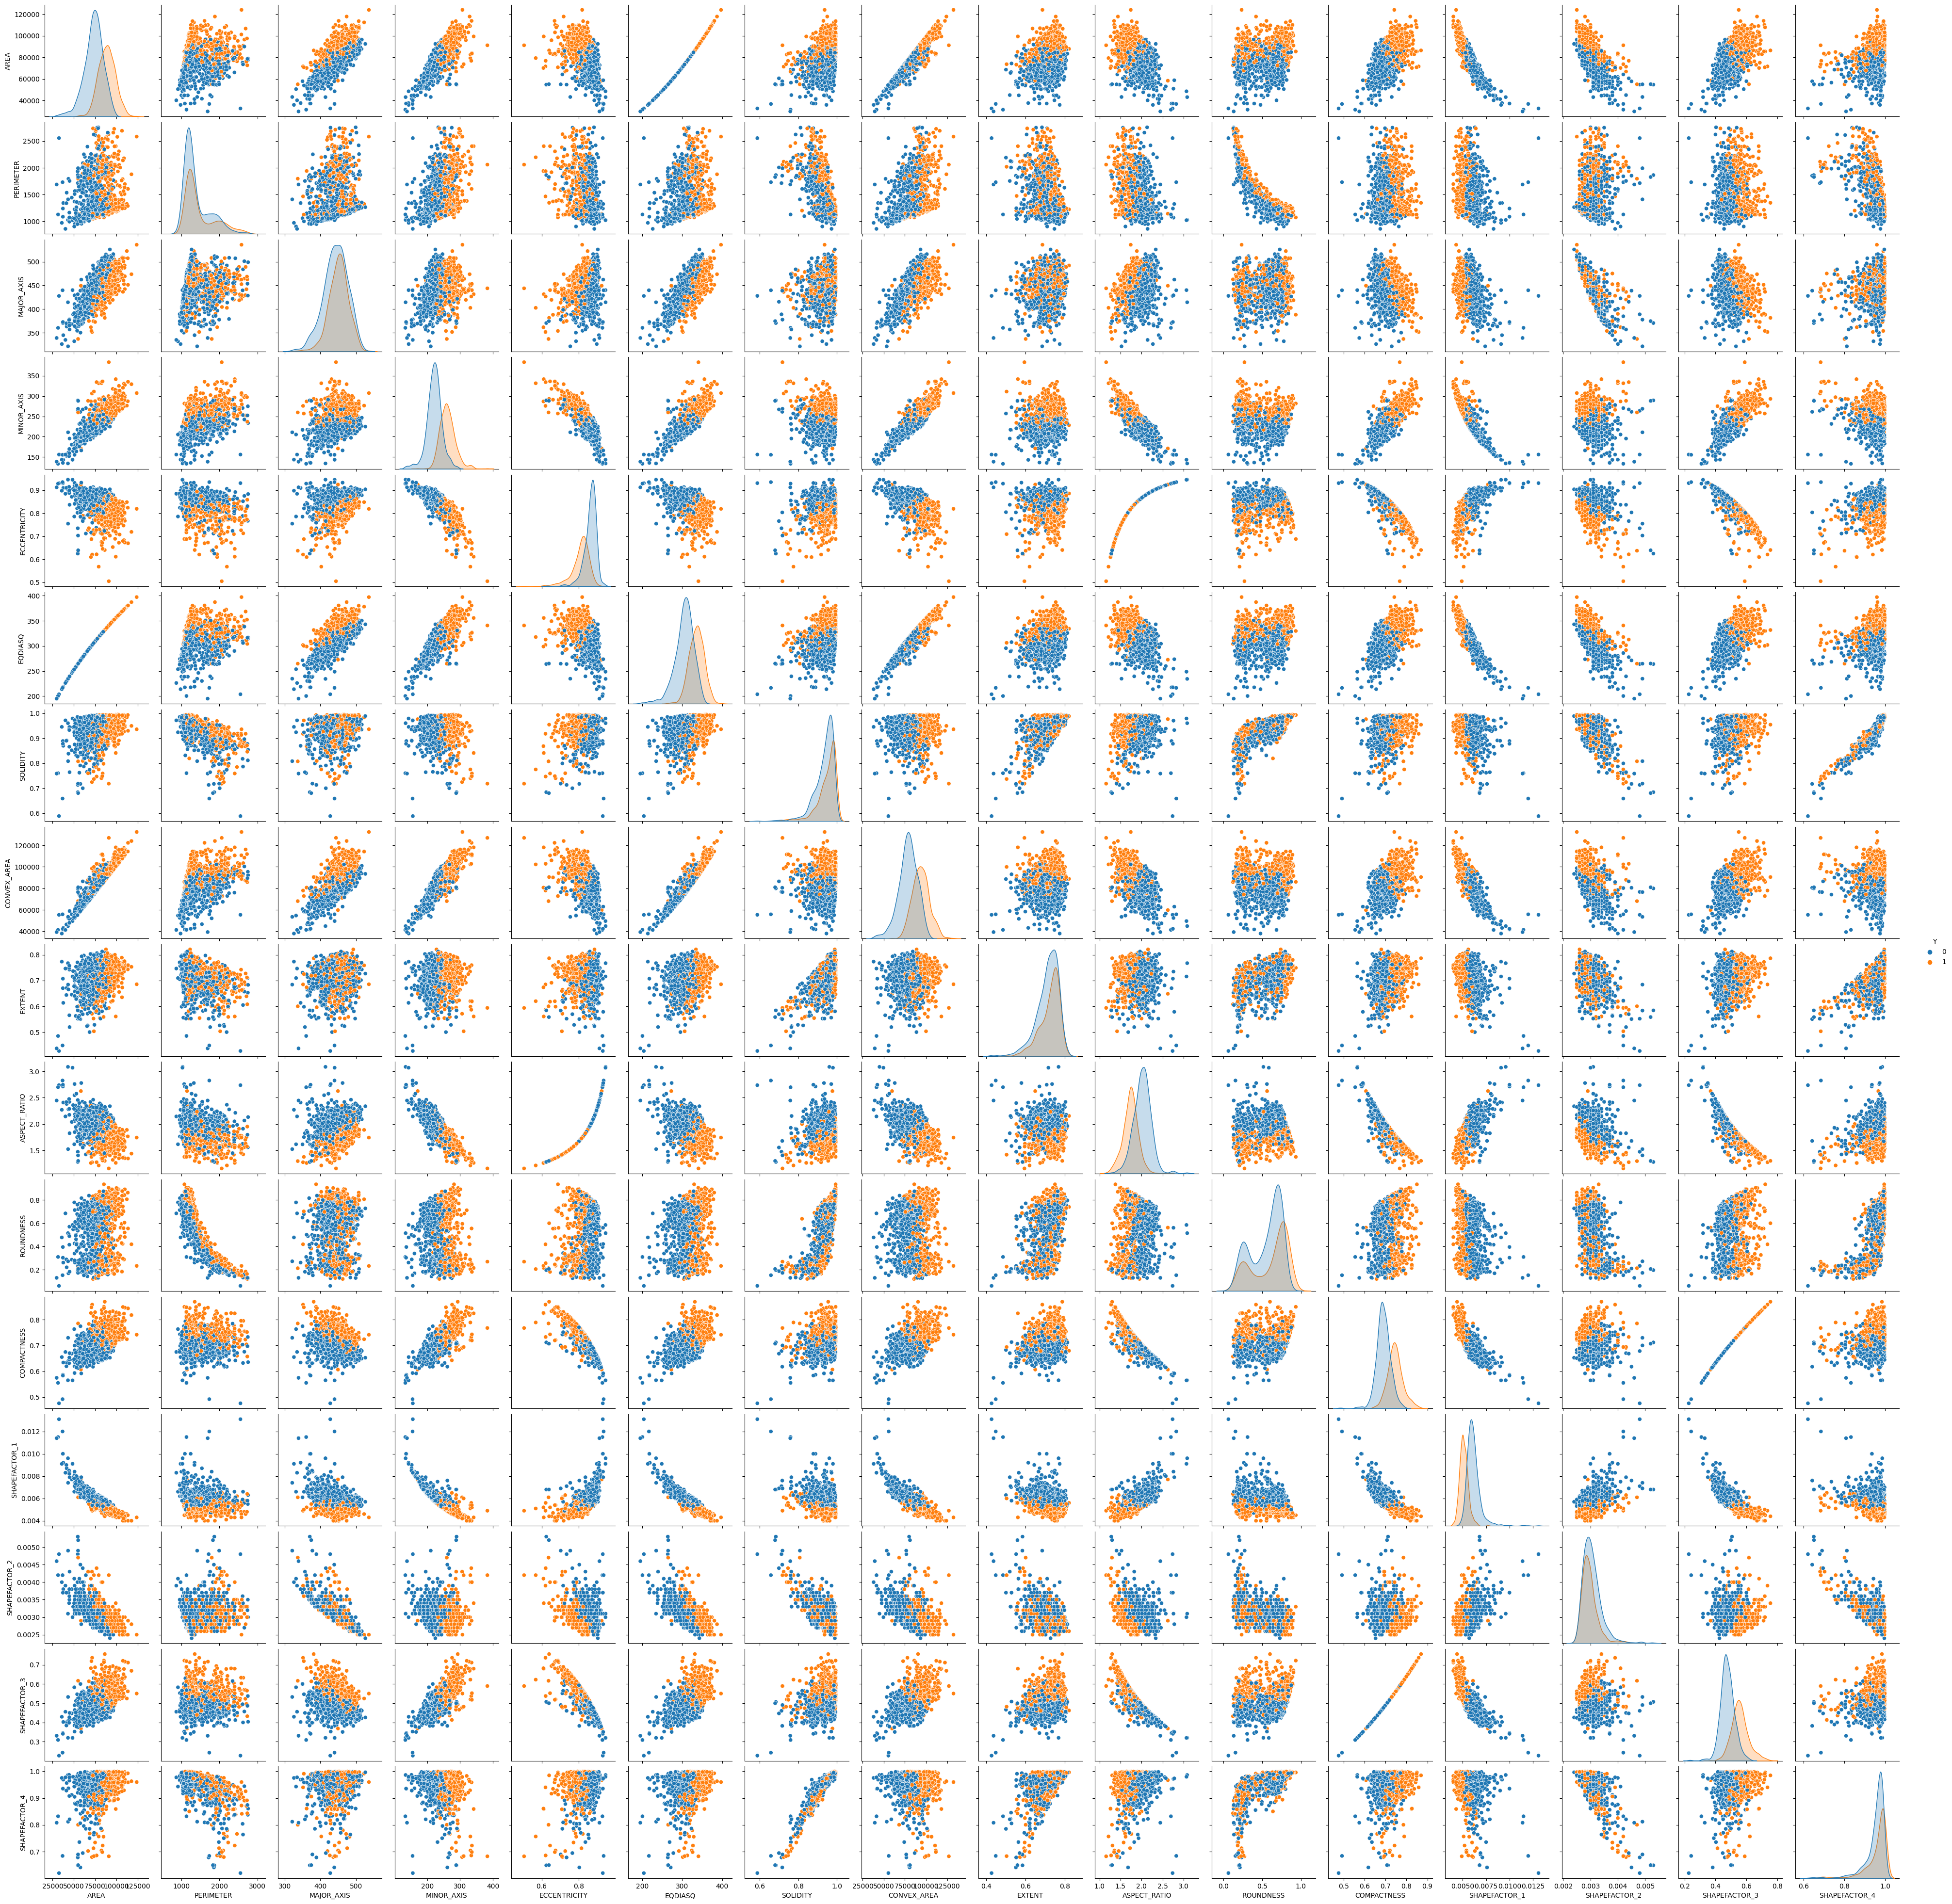

In [ ]:
#Plotting every feature against one another and identifying each dot based on pistachio classes
import seaborn as sns
sns.pairplot(xa, hue='Y')

In [ ]:
X_train = X_train.drop(['Y'], axis=1)

In [ ]:
X_train

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
1651   77232  1117.4310    439.6949    230.5794        0.8515  313.5839   
476    81583  1295.3361    479.0619    228.7762        0.8786  322.2960   
1361   70230  1867.8430    426.6893    236.2965        0.8327  299.0311   
877   101538  2028.5520    450.0862    300.9217        0.7436  359.5583   
774    74663  1183.1450    459.5966    211.4048        0.8879  308.3243   
...      ...        ...         ...         ...           ...       ...   
1080   84539  1224.8290    489.0164    225.3641        0.8875  328.0829   
104    97495  2725.9470    468.5151    297.1961        0.7731  352.3272   
1512   88744  1309.5190    448.2818    259.0974        0.8161  336.1434   
975    57762   996.6590    393.2243    188.0409        0.8782  271.1916   
732    92827  1778.8750    470.9737    257.7242        0.8370  343.7892   

      SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  \
1651    0.9518        81139  0.7547        1.9069     0.7773       0.7132   
476     0.9280        87911  0.6971        2.0940     0.6110       0.6728   
1361    0.8531        82323  0.6896        1.8057     0.2530       0.7008   
877     0.9308       109091  0.7080        1.4957     0.3101       0.7989   
774     0.9527        78374  0.7700        2.1740     0.6703       0.6709   
...        ...          ...     ...           ...        ...          ...   
1080    0.9662        87494  0.7486        2.1699     0.7081       0.6709   
104     0.8712       111913  0.7119        1.5765     0.1649       0.7520   
1512    0.9511        93309  0.7693        1.7302     0.6503       0.7498   
975     0.9825        58791  0.7618        2.0912     0.7307       0.6897   
732     0.9451        98219  0.7462        1.8274     0.3686       0.7300   

      SHAPEFACTOR_1  SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPEFACTOR_4  
1651         0.0057         0.0030         0.5086         0.9699  
476          0.0059         0.0028         0.4526         0.9478  
1361         0.0061         0.0034         0.4911         0.8869  
877          0.0044         0.0030         0.6382         0.9545  
774          0.0062         0.0028         0.4501         0.9784  
...             ...            ...            ...            ...  
1080         0.0058         0.0027         0.4501         0.9767  
104          0.0048         0.0030         0.5655         0.8915  
1512         0.0051         0.0029         0.5623         0.9728  
975          0.0068         0.0033         0.4756         0.9946  
732          0.0051         0.0028         0.5328         0.9737  

[1374 rows x 16 columns]

In [ ]:
#Import necessary library
from sklearn.linear_model import LogisticRegression

#Creating a list of max_iter values
max_iter_values = [10, 30, 50, 100, 200, 500]

#Iterate through the max_iter values and evaluate model performance to determine the ideal max_iter value that produces the most accurate result
for max_iter in max_iter_values:
    clf = LogisticRegression(max_iter=max_iter)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)

    #Measuring accuracy as an example metric
    accuracy = accuracy_score(Y_test, Y_pred)

    print(f"Max_iter={max_iter}, Accuracy={accuracy}")

Max_iter=10, Accuracy=0.625
Max_iter=30, Accuracy=0.6540697674418605
Max_iter=50, Accuracy=0.8604651162790697
Max_iter=100, Accuracy=0.8575581395348837
Max_iter=200, Accuracy=0.8575581395348837
Max_iter=500, Accuracy=0.8575581395348837


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

In [ ]:
#FIRST TRAINING


clf = LogisticRegression(max_iter = 50)

#Training of the classifier using X_train and Y_train
clf.fit(X_train, Y_train)

#Retrieving the prediction results in "Y_pred" using X_test
#Then measuring its accuracy against Y_test
Y_pred = clf.predict(X_test)
print("Accuracy: %.2f"
      % accuracy_score(Y_pred, Y_test))

Accuracy: 0.86


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#SCALING THE FIRST X_train and X_test


#Import necessary library
from sklearn.preprocessing import StandardScaler

#Scaling data
scaler = StandardScaler()
X2_train = scaler.fit_transform(X_train)
X2_test = scaler.transform(X_test)

In [ ]:
#SECOND TRAINING using scaled data


clf2 = LogisticRegression(max_iter = 50)

#Training of the classifier using X2_train and Y_train
clf2.fit(X2_train, Y_train)

#Retrieving the prediction results in "Y2_pred" using X2_test
#Then measuring its accuracy against Y_test
Y2_pred = clf2.predict(X2_test)
print("Accuracy: %.2f"
      % accuracy_score(Y2_pred, Y_test))

Accuracy: 0.87


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
pistachio_unique_class_values

['Kirmizi_Pistachio', 'Siit_Pistachio']

In [ ]:
#CLASSIFICATION REPORT FOR FIRST TRAINING


#Import necessary library
from sklearn.metrics import classification_report

#classification report
print ("For data without normalization")
print(classification_report(Y_test, Y_pred, target_names=pistachio_unique_class_values))

For data without normalization
                   precision    recall  f1-score   support

Kirmizi_Pistachio       0.82      0.93      0.87       177
   Siit_Pistachio       0.91      0.79      0.85       167

         accuracy                           0.86       344
        macro avg       0.87      0.86      0.86       344
     weighted avg       0.87      0.86      0.86       344



In [ ]:
#Manually calculating the macro average
(0.93+0.79)/2#RECALL

0.8600000000000001

In [ ]:
#Manually calculating the weighted average
(0.93*177+0.79*167)/(177+167) #RECALL TIMES SUPPORT

0.8620348837209303

In [ ]:
#Import necessary library
from sklearn.metrics import confusion_matrix

#Producing the confusion matrix for first training
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[164  13]
 [ 35 132]]


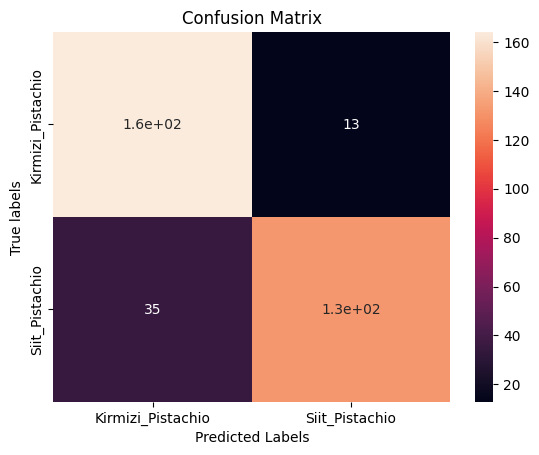

In [ ]:
#Plotting the confusion matrix for first training in a heat map
ax= plt.subplot()

sns.heatmap(cm, annot=True, ax=ax);

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

ax.xaxis.set_ticklabels(pistachio_unique_class_values); ax.yaxis.set_ticklabels(pistachio_unique_class_values);

In [ ]:
#CLASSIFICATION REPORT FOR SECOND TRAINING


print ("For data with normalization")
print(classification_report(Y_test, Y2_pred, target_names=pistachio_unique_class_values))

For data with normalization
                   precision    recall  f1-score   support

Kirmizi_Pistachio       0.83      0.93      0.88       177
   Siit_Pistachio       0.92      0.80      0.85       167

         accuracy                           0.87       344
        macro avg       0.87      0.86      0.87       344
     weighted avg       0.87      0.87      0.87       344



In [ ]:
#Producing the confusion matrix for second training
cm_2 = confusion_matrix(Y_test, Y2_pred)
print(cm_2)

[[165  12]
 [ 34 133]]


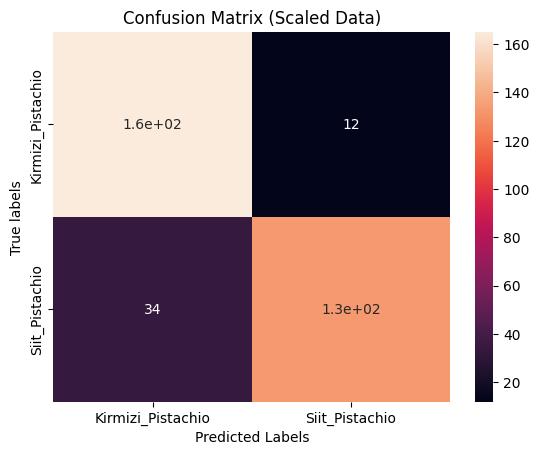

In [ ]:
#Plotting the confusion matrix for scaled data in a heat map
ax_2= plt.subplot()

sns.heatmap(cm_2, annot=True, ax=ax_2);

ax_2.set_xlabel('Predicted Labels');ax_2.set_ylabel('True labels');
ax_2.set_title('Confusion Matrix (Scaled Data)');

ax_2.xaxis.set_ticklabels(pistachio_unique_class_values); ax_2.yaxis.set_ticklabels(pistachio_unique_class_values);

# Question 3b
---



In [ ]:
###########################################################
#3b



#Import necessary library
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()

#Trains the Gaussian NB
clf_NB.fit(X_train, Y_train)
Y_pred_NB = clf_NB.predict(X_test)
print("Accuracy: %.2f"
      % accuracy_score(Y_pred_NB, Y_test))

Accuracy: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#CLASSIFICATION REPORT FOR Naïve Bayes


print("Classification Report for Naïve Bayes")
print(classification_report(Y_test, Y_pred_NB, target_names=pistachio_unique_class_values))

Classification Report for Naïve Bayes
                   precision    recall  f1-score   support

Kirmizi_Pistachio       0.85      0.84      0.84       177
   Siit_Pistachio       0.83      0.84      0.84       167

         accuracy                           0.84       344
        macro avg       0.84      0.84      0.84       344
     weighted avg       0.84      0.84      0.84       344



In [ ]:
#Producing the confusion matrix for Naïve Bayes
cm_NB = confusion_matrix(Y_test, Y_pred_NB)
print(cm_NB)

[[148  29]
 [ 26 141]]


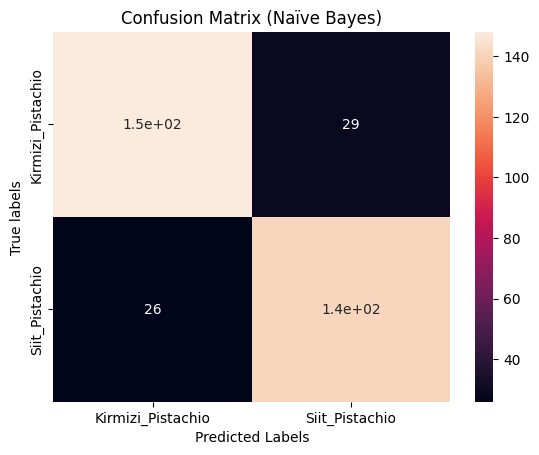

In [ ]:
#Plotting the confusion matrix for Naïve Bayes in a heat map
ax_NB= plt.subplot()

sns.heatmap(cm_NB, annot=True, ax=ax_NB);

ax_NB.set_xlabel('Predicted Labels');ax_NB.set_ylabel('True labels');
ax_NB.set_title('Confusion Matrix (Naïve Bayes)');

ax_NB.xaxis.set_ticklabels(pistachio_unique_class_values); ax_NB.yaxis.set_ticklabels(pistachio_unique_class_values);

# Question 3c
---



### Metrices from the algorithm used in 3(a) (Without normalisation):
Accuracy: 0.86   \
Precision for Class "Kirmizi_Pistachio": 0.82   \
Recall for Class "Kirmizi_Pistachio": 0.93    \
F1-score for Class "Kirmizi_Pistachio": 0.87   \
Precision for Class "Siit_Pistachio": 0.91   \
Recall for Class "Siit_Pistachio": 0.79   \
F1-score for Class "Siit_Pistachio": 0.85   \


### Metrices from the algorithm used in 3(a) (With normalisation):
Accuracy: 0.87   \
Precision for Class "Kirmizi_Pistachio": 0.83   \
Recall for Class "Kirmizi_Pistachio": 0.93   \
F1-score for Class "Kirmizi_Pistachio": 0.88   \
Precision for Class "Siit_Pistachio": 0.92   \
Recall for Class "Siit_Pistachio": 0.80   \
F1-score for Class "Siit_Pistachio": 0.85   \


###Metrices from the algorithm used in 3(b) (Naïve Bayes):
Accuracy: 0.84   \
Precision for Class "Kirmizi_Pistachio": 0.85   \
Recall for Class "Kirmizi_Pistachio": 0.84   \
F1-score for Class "Kirmizi_Pistachio": 0.84   \
Precision for Class "Siit_Pistachio": 0.83   \
Recall for Class "Siit_Pistachio": 0.84   \
F1-score for Class "Siit_Pistachio": 0.84   \


###Based on the results in both part (a) and (b),it can be observed that:
1. The algorithm with normalisation performed slightly better in terms of accuracy as compared to the algorithm without normalisation (0.87 vs. 0.86).
2. Both algorithms with and without normalisation have high accuracy (0.87 and 0.86) as compared to the Naïve Bayes classifier (0.84).
3. The algorithm with normalisation has a higher F1-score for Class "Kirmizi_Pistachio" (0.88) compared to the other two algorithms (0.87 without normalisation and 0.84 for Naïve Bayes). Meaning that algorithm with normalisation performs slightly better in terms of both precision and recall for Class "Kirmizi_Pistachio"
4. The Naïve Bayes classifier shows consistent precision, recall, and F1-scores for both classes, meanwhile the algorithms with and without normalisation shows slightly different performance for the two classes. This could indicate a possibility that the algorithms with and without normalisation have bias toward one of the classes.
5. Scaling or normalisation of the data seems to have a positive impact on the algorithm's performance as it has a slightly higher accuracy and improved F1-score for Class "Kirmizi_Pistachio" while outperforming the Naïve Bayes classifier in terms of accuracy and F1-score for Class "Kirmizi_Pistachio."